<a href="https://colab.research.google.com/github/szeshiang/Advanced-Computer-Vision/blob/main/070824_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using the pre-trained Faster RCNN model, detect the object in the images, along with the class

In [4]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as f   # transform into tensor
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
print('all libraries imported')

all libraries imported


In [9]:
# load the image
image_path='zebra.jpg'
image=Image.open(image_path)
image_tensor=f.to_tensor(image)

In [10]:
image_tensor.shape

torch.Size([3, 386, 640])

In [12]:
# load the model
model=fasterrcnn_resnet50_fpn(weights=True)
print('model loaded successfully')

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


model loaded successfully


In [13]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [14]:
with torch.no_grad():
    predictions=model([image_tensor])  # model will make pred without calculating gradient

In [15]:
# predictions; going to access the dictionary
boxes=predictions[0]['boxes'].cpu().numpy()   # [0] because there is no other siblings. numpy array can only be created using cpu
labels=predictions[0]['labels'].cpu().numpy()
scores=predictions[0]['scores'].cpu().numpy()

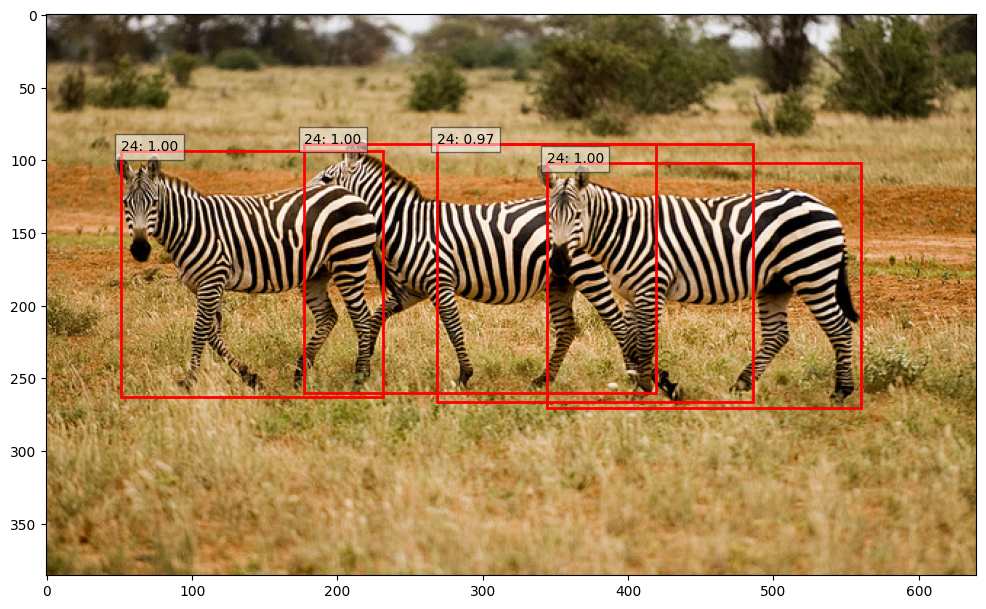

In [17]:
# Extract results
boxes = predictions[0]['boxes'].cpu().numpy()
labels = predictions[0]['labels'].cpu().numpy()
scores = predictions[0]['scores'].cpu().numpy()


# Display the image and overlay the detected bounding boxes
fig, ax = plt.subplots(1, figsize=(12,9))
ax.imshow(image)


for box, label, score in zip(boxes, labels, scores):
    if score > 0.5:  # Consider only predictions with high confidence
        x, y, width, height = box
        rect = patches.Rectangle((x, y), width - x, height - y, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x, y, f"{label}: {score:.2f}", bbox=dict(facecolor='white', alpha=0.5))


plt.show()


In [18]:
# load the image
image_path='multiple_animals.jpg'
image=Image.open(image_path)
image_tensor=f.to_tensor(image)

In [19]:
# Load the pre-trained model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [20]:
# COCO classes (91 classes, including background)
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A',
    'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut',
    'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A',
    'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 'clock',
    'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [21]:
# Make predictions
with torch.no_grad():
    prediction = model([image_tensor])

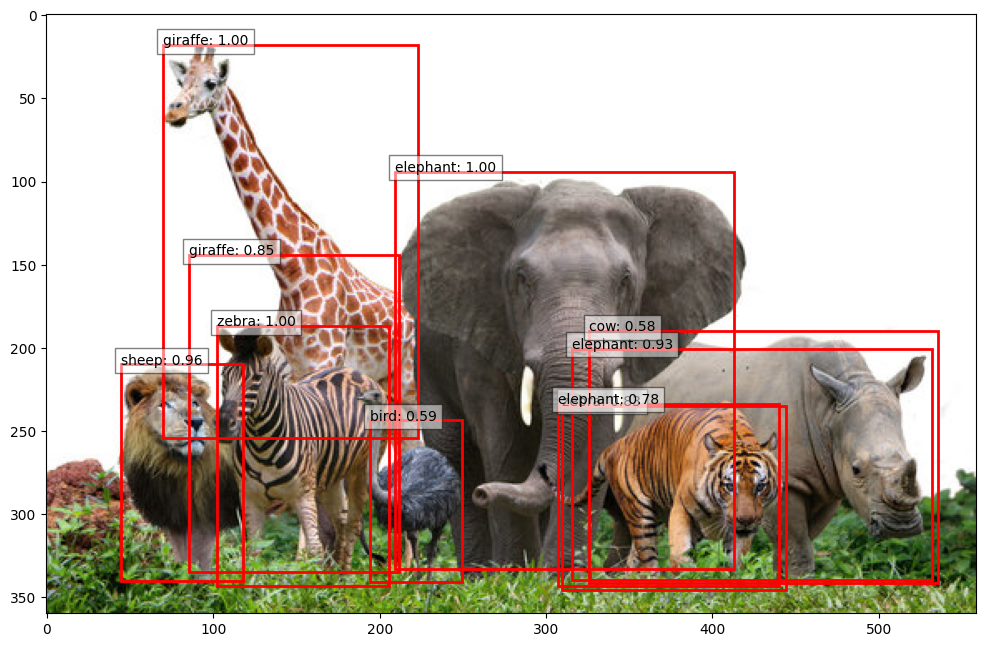

Total objects detected: 10
Label: elephant, Score: 1.00
Label: giraffe, Score: 1.00
Label: zebra, Score: 1.00
Label: sheep, Score: 0.96
Label: elephant, Score: 0.93
Label: giraffe, Score: 0.85
Label: zebra, Score: 0.83
Label: elephant, Score: 0.78
Label: bird, Score: 0.59
Label: cow, Score: 0.58


In [22]:
# Extract results
boxes = prediction[0]['boxes'].cpu().numpy()
labels = prediction[0]['labels'].cpu().numpy()
scores = prediction[0]['scores'].cpu().numpy()


# Display the image and overlay the detected bounding boxes
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(image)


# Count the number of detected objects
detected_objects = []


for box, label, score in zip(boxes, labels, scores):
    if score > 0.5:  # Consider only predictions with high confidence
        x, y, width, height = box
        rect = patches.Rectangle((x, y), width - x, height - y, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x, y, f"{COCO_INSTANCE_CATEGORY_NAMES[label]}: {score:.2f}", bbox=dict(facecolor='white', alpha=0.5))
        detected_objects.append((COCO_INSTANCE_CATEGORY_NAMES[label], score))


plt.show()


# Print the count of detected objects
print(f"Total objects detected: {len(detected_objects)}")
for obj in detected_objects:
    print(f"Label: {obj[0]}, Score: {obj[1]:.2f}")
